In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data from csv into dataframe



In [22]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Check the data structure

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


## Data Wrangling

In [26]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

Conclusion 1: We have to ignore the record which do not have township/zip_details.

## Remove null zip record


In [32]:
df_wrang_zip = df[pd.notnull(df['zip'])]
df_wrang_zip.isnull().sum()

lat            0
lng            0
desc           0
zip            0
title          0
timeStamp      0
twp          124
addr           0
e              0
dtype: int64

## Remove null twp records

In [35]:
df_wrang = df_wrang_zip[pd.notnull(df_wrang_zip['twp'])]
df_wrang.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

## Data Structure about final dataset after Data Wrangling

In [38]:
df_wrang.info()

<class 'pandas.core.frame.DataFrame'>
Index: 583199 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        583199 non-null  float64
 1   lng        583199 non-null  float64
 2   desc       583199 non-null  object 
 3   zip        583199 non-null  float64
 4   title      583199 non-null  object 
 5   timeStamp  583199 non-null  object 
 6   twp        583199 non-null  object 
 7   addr       583199 non-null  object 
 8   e          583199 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 44.5+ MB


## Start Analysis

In [41]:
df_wrang.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1


## Top 10 zipcodes for 911 codes

In [44]:
df_wrang['zip'].value_counts().head(10)

zip
19401.0    45596
19464.0    43902
19403.0    34888
19446.0    32268
19406.0    22456
19002.0    21065
19468.0    18938
19046.0    17885
19454.0    17656
19090.0    17376
Name: count, dtype: int64

## Top 4 Townships(twp) for 911 calls


In [47]:
df_wrang['twp'].value_counts().head(4)

twp
LOWER MERION    47487
ABINGTON        38137
NORRISTOWN      35881
POTTSTOWN       26837
Name: count, dtype: int64

## Unique count of emergency(title)

In [50]:
df_wrang['title'].nunique()

144

In [52]:
df_wrang['Department']=df_wrang['title'].apply(lambda val:val.split(':')[1])
df_wrang['Reason']=df_wrang['title'].apply(lambda val:val.split(':')[0])
df_wrang.head()

/var/folders/fp/nyxgvvb51wddlfwln3h16tw40000gn/T/ipykernel_20429/2692396395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wrang['Department']=df_wrang['title'].apply(lambda val:val.split(':')[1])
/var/folders/fp/nyxgvvb51wddlfwln3h16tw40000gn/T/ipykernel_20429/2692396395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wrang['Reason']=df_wrang['title'].apply(lambda val:val.split(':')[0])


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,HEAD INJURY,EMS


## Create new feature:What is the most common Reason for a 911 call based on Reason Column? Which comes second

Create two different field from existing data frame named as department and Reason

In [54]:
df_wrang['Department']=df_wrang['title'].apply(lambda val:val.split(':')[1])
df_wrang['Reason']=df_wrang['title'].apply(lambda val:val.split(':')[0])
df_wrang.head()

/var/folders/fp/nyxgvvb51wddlfwln3h16tw40000gn/T/ipykernel_20429/2692396395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wrang['Department']=df_wrang['title'].apply(lambda val:val.split(':')[1])
/var/folders/fp/nyxgvvb51wddlfwln3h16tw40000gn/T/ipykernel_20429/2692396395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wrang['Reason']=df_wrang['title'].apply(lambda val:val.split(':')[0])


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,HEAD INJURY,EMS


## Check Unique Department

In [57]:
df_wrang['Department'].unique()

array([' BACK PAINS/INJURY', ' DIABETIC EMERGENCY', ' GAS-ODOR/LEAK',
       ' CARDIAC EMERGENCY', ' HEAD INJURY', ' NAUSEA/VOMITING',
       ' RESPIRATORY EMERGENCY', ' SYNCOPAL EPISODE',
       ' VEHICLE ACCIDENT -', ' DIZZINESS', ' VEHICLE ACCIDENT',
       ' DISABLED VEHICLE -', ' APPLIANCE FIRE', ' GENERAL WEAKNESS',
       ' CARBON MONOXIDE DETECTOR', ' UNKNOWN MEDICAL EMERGENCY',
       ' UNRESPONSIVE SUBJECT', ' CVA/STROKE', ' FIRE ALARM',
       ' ROAD OBSTRUCTION -', ' SUBJECT IN PAIN', ' HEMORRHAGING',
       ' FALL VICTIM', ' ASSAULT VICTIM', ' SEIZURES',
       ' MEDICAL ALERT ALARM', ' ABDOMINAL PAINS', ' PUMP DETAIL',
       ' FIRE INVESTIGATION', ' OVERDOSE', ' MATERNITY',
       ' UNCONSCIOUS SUBJECT', ' CHOKING', ' LACERATIONS',
       ' TRASH/DUMPSTER FIRE', ' UNKNOWN TYPE FIRE', ' BUILDING FIRE',
       ' ELECTRICAL FIRE OUTSIDE', ' DEBRIS/FLUIDS ON HIGHWAY',
       ' DEBRIS/FLUIDS ON HIGHWAY -', ' FEVER', ' ALLERGIC REACTION',
       ' FRACTURE', ' RESCUE - GENERAL

Conclusion: There are 3 unique reasons and 81 unique department

## Most Common Reason for 911 call with visual representation

In [61]:
df_wrang['Reason'].value_counts()[:3]

Reason
EMS        304785
Traffic    189597
Fire        88817
Name: count, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

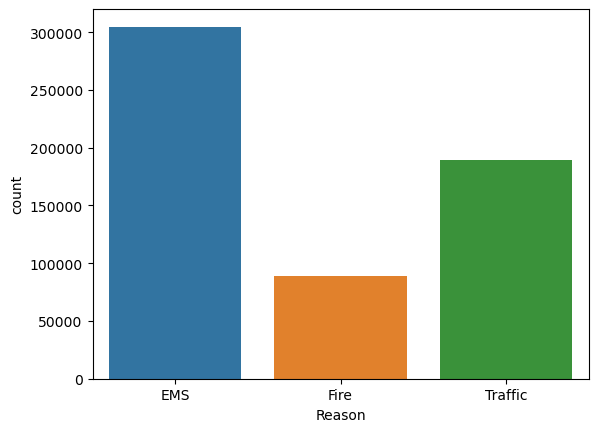

In [72]:
sns.countplot(x=df_wrang['Reason'])

## Top 5 depatrment for emeergency call with visual representation

In [93]:
df_wrang['Department'].value_counts().head(5)

Department
 VEHICLE ACCIDENT -       125113
 DISABLED VEHICLE -        36935
 FIRE ALARM                36351
 FALL VICTIM               32762
 RESPIRATORY EMERGENCY     32497
Name: count, dtype: int64

<Axes: ylabel='Department'>

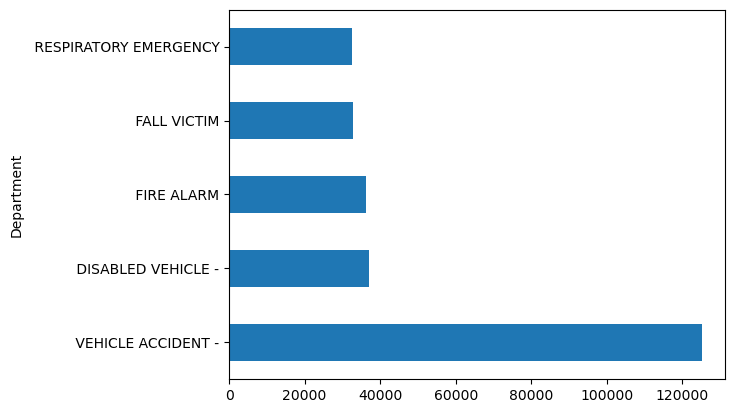

In [95]:

df_wrang.groupby('Department').count().sort_values('e',ascending=0)[:5]['e'].plot(kind='barh')

## Top 5 Township for emergency calling with visual representation

In [87]:
df_wrang['twp'].value_counts().head(5)
                                


twp
LOWER MERION    47487
ABINGTON        38137
NORRISTOWN      35881
POTTSTOWN       26837
CHELTENHAM      26647
Name: count, dtype: int64

<Axes: ylabel='twp'>

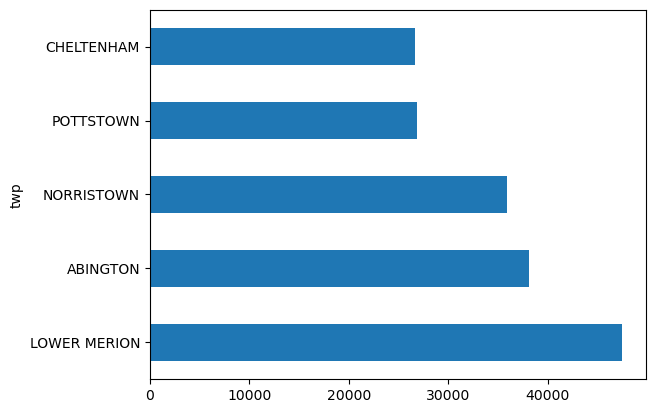

In [91]:
df_wrang.groupby('twp').count().sort_values('e' ,ascending=0)[:5]['e'].plot(kind='barh')

## Top 5 township with reasons with visual representaion

In [98]:
tmplst = list(df_wrang['twp'].value_counts()[:5].index)
tmplst

['LOWER MERION', 'ABINGTON', 'NORRISTOWN', 'POTTSTOWN', 'CHELTENHAM']

<Axes: xlabel='twp', ylabel='count'>

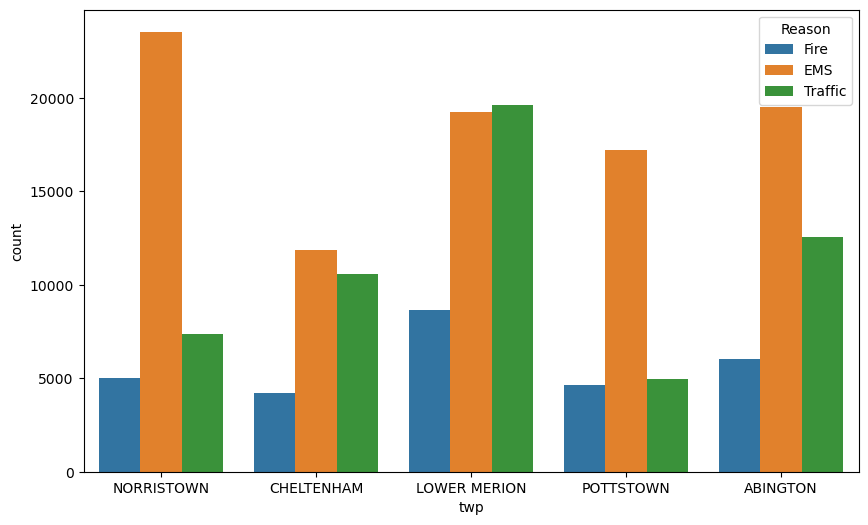

In [100]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_wrang[df_wrang['twp'].apply(lambda x:(True if x in tmplst else False))],x='twp',hue='Reason')

## DateTime Analysis for Emergency calls

Coverting String coloum to datetime format

In [105]:
df_wrang['timeStamp']=pd.to_datetime(df_wrang['timeStamp'])

/var/folders/fp/nyxgvvb51wddlfwln3h16tw40000gn/T/ipykernel_20429/1672984824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wrang['timeStamp']=pd.to_datetime(df_wrang['timeStamp'])


Creating new column for Month, Day of week

Converting day of the week and month from numbers to string


In [115]:
daydict_ = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df_wrang['DayOfWeek']=df_wrang['DayOfWeek'].map(daydict_)

/var/folders/fp/nyxgvvb51wddlfwln3h16tw40000gn/T/ipykernel_20429/2615317360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wrang['DayOfWeek']=df_wrang['DayOfWeek'].map(daydict_)


In [117]:
df_wrang.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,12,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,12,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,12,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,12,Thur
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,HEAD INJURY,EMS,12,Thur


In [119]:
mondict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df_wrang['Month']=df_wrang['Month'].map(mondict)

/var/folders/fp/nyxgvvb51wddlfwln3h16tw40000gn/T/ipykernel_20429/2581298642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wrang['Month']=df_wrang['Month'].map(mondict)


In [121]:
df_wrang.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,Dec,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,Dec,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,Dec,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,Dec,Thur
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,HEAD INJURY,EMS,Dec,Thur


<Axes: xlabel='Month', ylabel='count'>

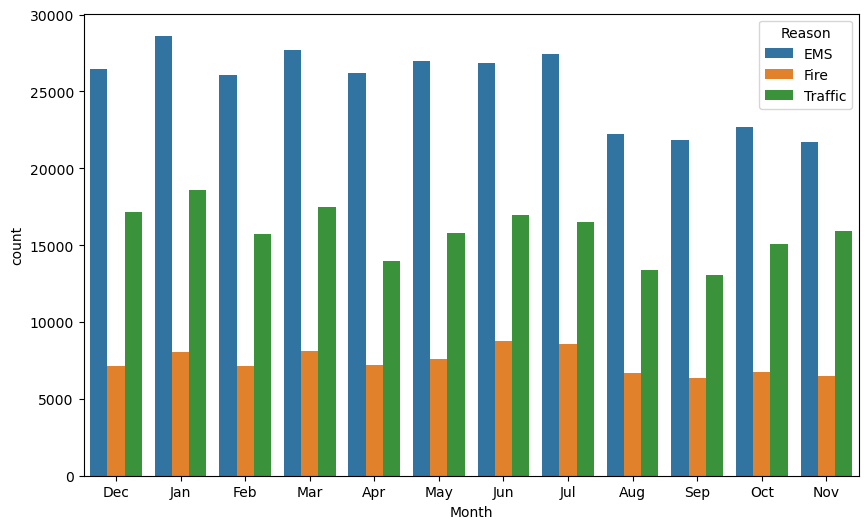

In [123]:
plt.figure(figsize=(10,6))
sns.countplot(x='Month',data=df_wrang,hue='Reason')

## Conclusion: June --Barbeque and Holidays time received maximum Fire call

<Axes: xlabel='DayOfWeek', ylabel='count'>

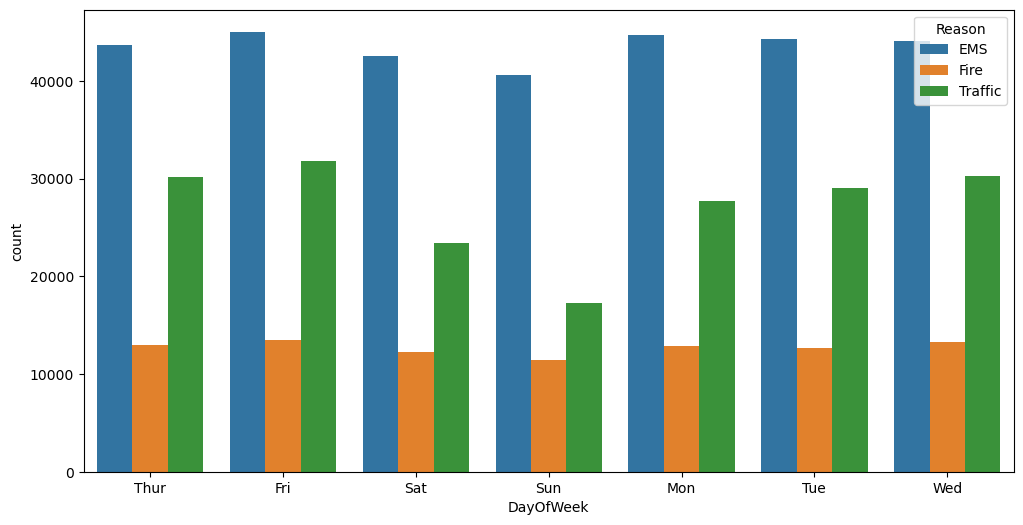

In [126]:
plt.figure(figsize=(12,6))
sns.countplot(x='DayOfWeek',data=df_wrang,hue='Reason')

Conclusion: As expected --Sunday always less traffic
